In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
  
auto_mpg = fetch_ucirepo(id=9) 

X = auto_mpg.data.features 
y = auto_mpg.data.targets 

df = pd.concat([X, y], axis=1)
df.head()


,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   mpg           398 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [12]:
def outliers(df, columna_grupo, columna_valor):
    resultados = []
    for grupo, datos in df.groupby(columna_grupo, observed=False)[columna_valor]:
        Q1 = datos.quantile(0.25)
        Q3 = datos.quantile(0.75)
        IQR = Q3 - Q1
        limite_sup = Q3 + 1.5 * IQR
        limite_inf = Q1 - 1.5 * IQR
        outliers = datos[(datos < limite_inf) | (datos > limite_sup)].values

        resultados.append({
            columna_grupo: grupo,
            "Q1": Q1,
            "Q3": Q3,
            "IQR": IQR,
            "outlier inferior": limite_inf,
            "outlier superior": limite_sup,
        })
    tabla = pd.DataFrame(resultados)
    display(tabla)

## ¿Cómo varía el peso de los autos a través de los años?


In [4]:
years = df['model_year']
bins = [69, 72, 75, 78, 82]
labels = ['70-72', '73-75', '76-78', '79-82']
df['year_range'] = pd.cut(years, bins=bins, labels=labels, right=True, include_lowest=True)


In [33]:
promedioMinMax = df.groupby('year_range', observed=False)['weight'].agg(['mean', 'std', 'min', 'max']).round(2)
promedioMinMax['promedi_ peso'] = promedioMinMax['mean'].astype(str) + ' ± ' + promedioMinMax['std'].astype(str)
promedioMinMax = promedioMinMax.reset_index()[['year_range',promedio_pesotd', 'min', 'max']]
display(promedioMinMax)


,year_range,promedio_peso,min,max
0,70-72,3203.99 ± 966.87,1613,5140
1,73-75,3193.49 ± 925.35,1649,4997
2,76-78,2975.8 ± 782.01,1795,4380
3,79-82,2614.35 ± 586.38,1755,4360


El peso promedio de los autos muestra una tendencia descendente pasando de mas o menos 3200 libras a inicios de los 70 a unas 2600 libras a inicios de los 80.  
Los valores mínimos se mantienen siempre por debajo de las 1800 libras y los valores máximos se mantienen por encima de las 4300 libras en todos los periodos, lo que indica la presencia constante tanto de modelos compactos y livianos como de modelos pesados en todas las décadas.  
Queriendo decir, que aunque el promedio ha disminuido con el tiempo la diversidad en el peso de los vehículos ha sido amplia a través de los años 70 y 80.

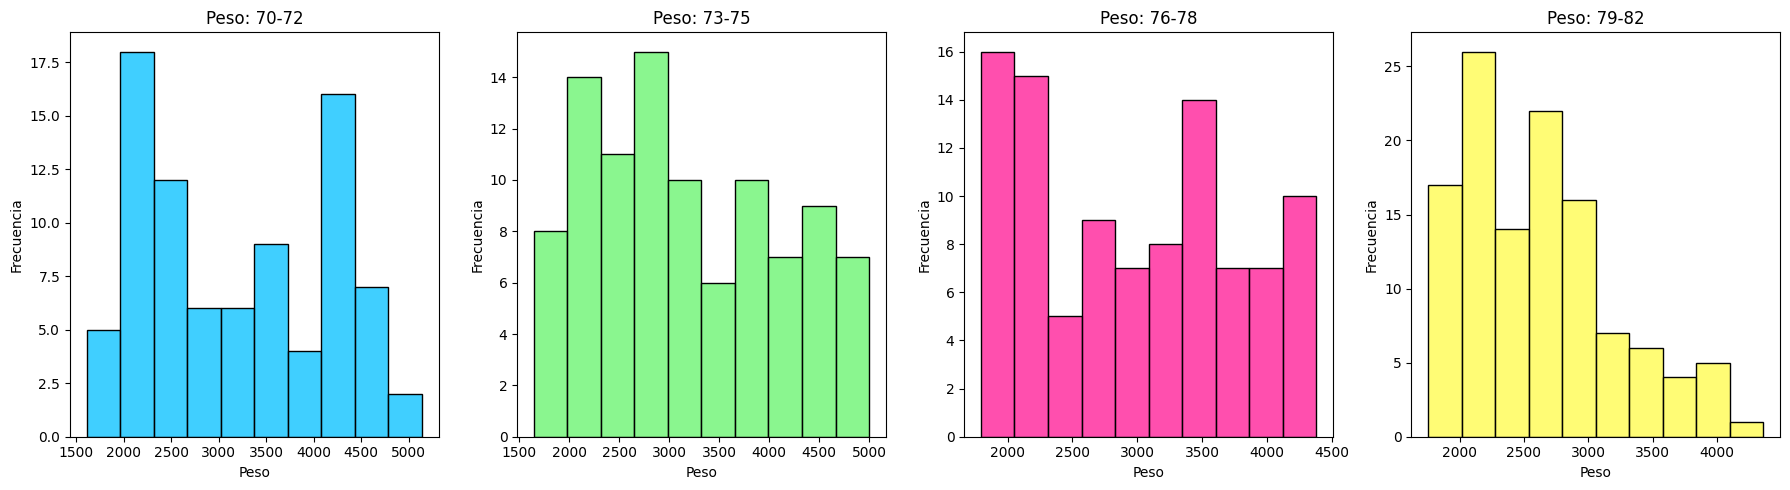

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

colores = {"70-72": "deepskyblue", "73-75": "#63F36A", "76-78": "deeppink", "79-82": "#FFFC47"}
plt.figure(figsize=(18, 5))
for i, label in enumerate(labels):
    plt.subplot(1, len(labels), i+1)
    datos = df[df['year_range'] == label]['weight']
    sns.histplot(datos, bins=10, color=colores[label], edgecolor='black')
    plt.title(f'Peso: {label}')
    plt.xlabel('Peso')
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


**Análisis histograma**  
A traves de los años el peso de los autos ha disminuido mas exactamente en los modelos pertenecientes al rango 79-82, tratando de mostrar una distribución sesgada a la izquierda, es decir que su moda se encuentra en los pesos iniciales y a traves de que el peso aumenta la frecuencia disminuye.  
En los periodos iniciales 70-75 se observa una distribución más amplia con una presencia considerable de vehículos pesados que superan las 4000 lbs.  
A partir del periodo 76-78 la concentración comienza a desplazarse hacia pesos intermedios.
 
Se puede decir, que con el tiempo ha habido una clara tendencia hacia vehículos más ligeros probablemente impulsada por cambios en diseño, consumo de combustible o tener un carro más agil.


In [13]:
outliers(df, 'year_range', 'weight')

,year_range,Q1,Q3,IQR,outlier inferior,outlier superior
0,70-72,2278.0,4135.00,1857.00,-507.500,6920.500
1,73-75,2401.0,3907.00,1506.00,142.000,6166.000
2,76-78,2206.5,3573.00,1366.50,156.750,5622.750
3,79-82,2130.0,2941.25,811.25,913.125,4158.125


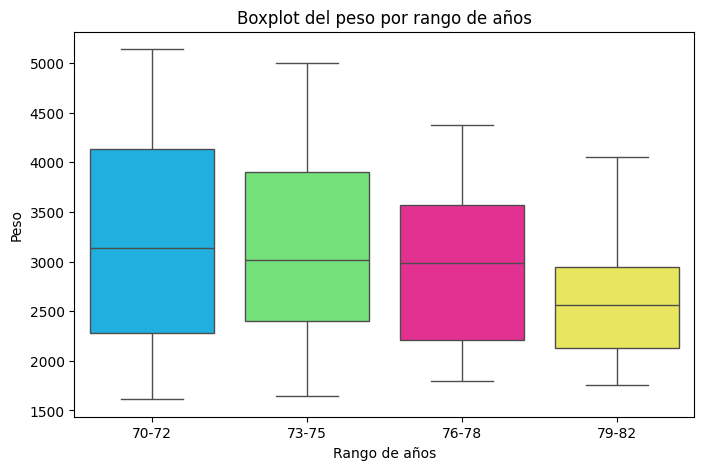

In [35]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='year_range', y='weight', hue='year_range', palette=colores, showfliers=False, legend=False)
plt.title('Boxplot del peso por rango de años')
plt.xlabel('Rango de años')
plt.ylabel('Peso')
plt.show()

**Análisis boxplot**  
A lo largo de los años tanto la mediana como la dispersión del peso de los autos han disminuido de forma constante.
En el periodo 70-72 la mayoría de los vehículos se encontraban entre aproximadamente 2300 y 4100 libras, mientras que para 79-82 este rango se redujo a entre 2100 y 2940 libras, indicando una clara disminución del peso de los vehiculos.
A pesar de ello, en todos los periodos se observan valores atípicos superiores lo que muestra la presencia de modelos considerablemente más pesados que el promedio.

### Conclusión
El peso de los autos ha mostrado una reducción progresiva desde principios de los 70 hasta inicios de los 80, pasando de promedios superiores a las 3200 lbs a unos aproximadamente en 2600 lbs, evidenciando pesos mas ligeros a medida que los años pasan.  
Aunque esta tendencia refleja un cambio hacia vehículos más eficientes y posiblemente más ágiles, en todos los periodos se mantuvo una diversidad considerable, con la presencia constante de modelos pesados que superan las 4000 lbs lo que muestra que la transición no fue uniforme para todos los rangos de modelos.